In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:

file_path = "C:\\Users\\DBRok\\Downloads\\Visadataset.csv"

visa_df = pd.read_csv(file_path)

visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [33]:
# continent columns value counts

visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [34]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [35]:
# Q1) out of all asian applicants how many got visa
#     out of all europe applicants how many go visa

In [36]:
con1 = visa_df['continent']=='Asia'
con2 = visa_df['case_status']=='Certified'
con = con1&con2
len(visa_df[con])

11012

In [37]:
visa_df['continent'].unique()
visa_df['continent'].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [38]:
# create a generalised expression

lables = visa_df['continent'].unique()
for i in lables:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con = con1&con2
    print(len(visa_df[con]))

11012
397
2037
2957
493
122


In [39]:
# put the printed values in a list

certified_count = []
lables = visa_df['continent'].unique()
for i in lables:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con = con1&con2
    certified_count.append(len(visa_df[con]))

lables,certified_count

pd.DataFrame( zip (lables,certified_count),
             columns=['continent','case_status'])



,continent,case_status
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [40]:
# Adding Denied_count

denied_count = []
certified_count = []
lables = visa_df['continent'].unique()
for i in lables:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'

    certified_count.append(len(visa_df[con1&con2]))
    denied_count.append(len(visa_df[con1&con3]))


pd.DataFrame( zip (lables,certified_count,denied_count),
             columns=['continent','certified','denied'])



,continent,certified,denied
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


In [41]:
pd.DataFrame( zip (lables,certified_count,denied_count),
             columns=['continent','certified','denied']).set_index('continent')


,certified,denied
continent,,
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


$pd.crosstab$


In [42]:
col1 = visa_df['continent']
col2 = visa_df['case_status']

result1 = pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

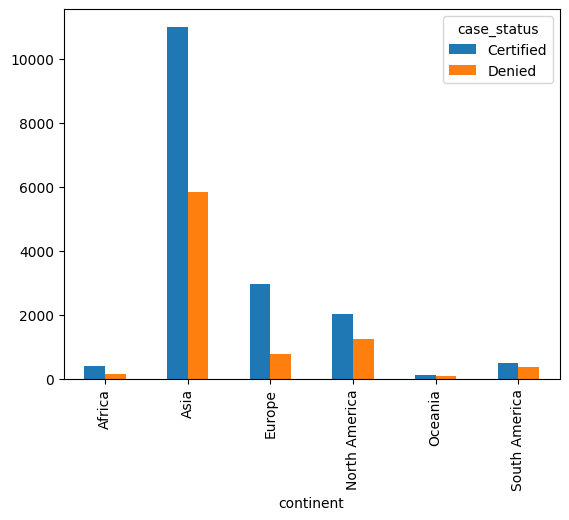

In [43]:
result1.plot(kind='bar')

In [44]:
# Doing crosstab with 3 columns
# Education
# Case Status

col1 = visa_df['continent']  # index column
col2 = visa_df['case_status']
col3 = visa_df['education_of_employee']
col=[col2, col3]  # values column

result2 = pd.crosstab(col1,col)

result2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

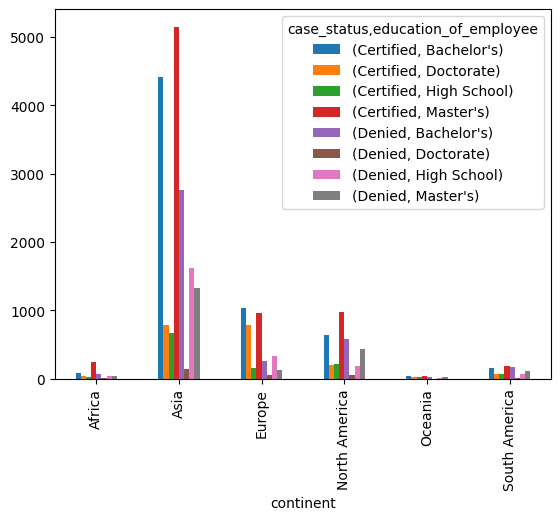

In [45]:
result2.plot(kind='bar')
plt.show()

**Numerical vs Numerical**

$plt.scatter$

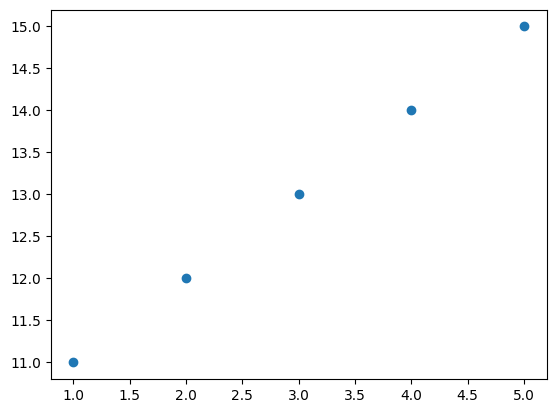

In [46]:
x = [1,2,3,4,5]
y = [11,12,13,14,15]

# (1,11),(2,12),(3,13),(4,14),(5,15)

plt.scatter(x,y)

In [47]:
x = [ i for i in range(-10,11) ]
y = [ i*i for i in x ]
x

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [48]:
y

[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

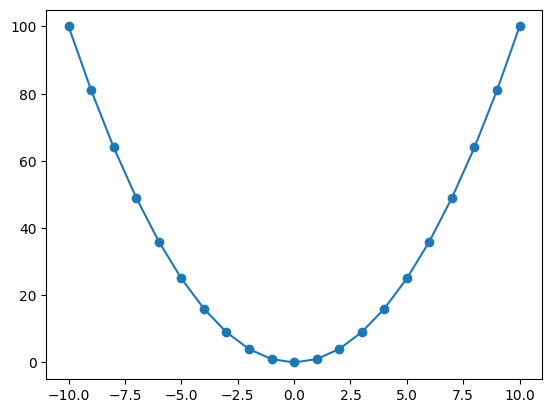

In [49]:
plt.scatter(x,y)
plt.plot(x,y)

- Scatter plots for only numerical analysis

- Scatter plots provides an idea, both variables are related or not related.

- Positive relation
    - Increase in the curve

- Negative relation
    - Decrease in the curve

- No relation
    - Neither increase nor Decrease

In [50]:
dtypes = dict(visa_df.dtypes)

num=[ i for i in dtypes if dtypes[i]!='O' ]
num

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

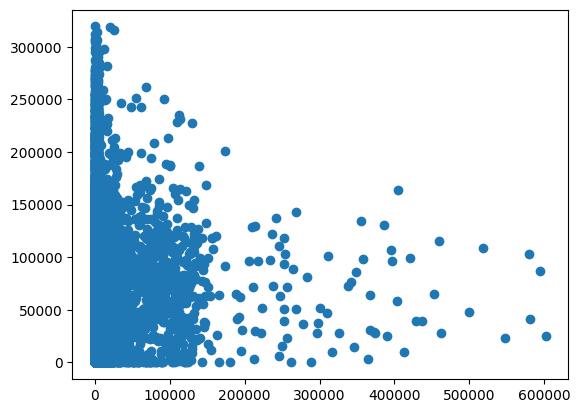

In [51]:
col1 = visa_df['no_of_employees']
col2 = visa_df['prevailing_wage']

plt.scatter(col1,col2)

In [52]:
#Covariance-matrix

#How many numerical variables are there : 3
    
#             no_employee   yr    wage
        
#no_employee   var         cov    cov

#yr            cov         var    cov

#age           cov         cov     var

$correlation-coeffiecinet$

- Denoted with r

- r range from -1 to 1

- postive relation range = (0,1]  <-- 0 not included
                            
- negative relation range = [-1,0)  <-- 0 not included
                             
- no relation = 0

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="BulXZ5G8ErOY4-EPmoPwoA4_11" data-atf="0">

In [53]:
visa_df.corr(numeric_only=True) # applicable for yo need to see numeric_only

# in the data frame we have both cat and numerical column
# correlation applicable for only numerical column
# Explicitly mention numeric= True

# If people has pandas old version
# they dont have numeric_only argument
# for them  visa_df.corr() works

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


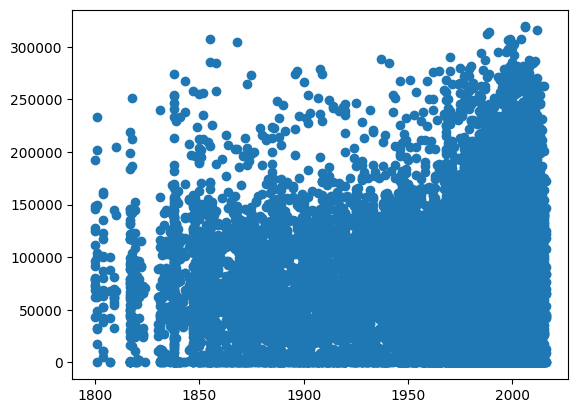

In [54]:
plt.scatter(visa_df['yr_of_estab'],visa_df['prevailing_wage'])

- EDA session-1

     - Read the data
     
     - Create the data frame using list
     
     - Create the data frame using dictionary
    
     - How to save the dataframe
        
     - How to add new column
    
     - How to drop new column
        
- EDA session-2:
    
     - shape/size
        
     - columns/dtypes
    
     - head/tail
        
     - take/loc/iloc
    
     - isnull/len
        
- EDA session-3 Categorical data analysis

     - How to read a column
    
     - unique/nunique
        
     - value counts
    
     - we created a frequncy table by our own skill
        
     - bar chart
    
     - pie chart
        
        
- EDA session -4  Numerical data analysis
  
     - How to read a column
        
     - statistical measurements
    
     - mean/median/count/max/min/std/25/50/75
        
     - describe function
    
     - using numpy we draw measurements
        
     - Histogram
    
     - we checked the empiricle rule
        
        
- EDA session-5 Outlier analysis

     - We draw box plot
    
     - we implemented how to find outlier
        
     - we remove the outliers
    
     - we imputed with median
        
     - np.where
    

- EDA session-6: Bi variate and multivariate analysis
    
    - we draw two cat columns analysis
    
    - we implemented by our own skill
    
    - pd.crosstab
    
    - draw the plots
    
    - we repeated multiple columns
    
    - for two numerical columns plt.scatter
    
    - correlation data.corr
    
    - matrix
    
    - heatmap

In [55]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [56]:
# matrix
# showing values in a matrix
# showing values in a picture: Heatmap

<Axes: >

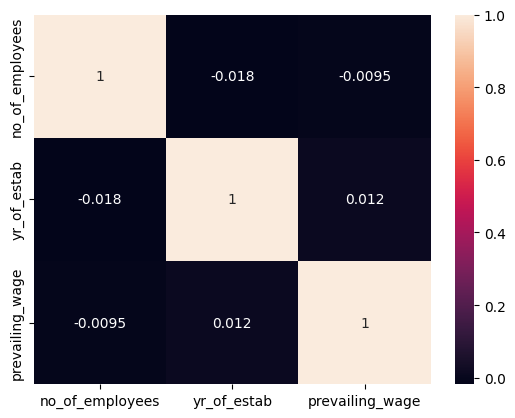

In [57]:
corr_data = visa_df.corr(numeric_only=True)

sns.heatmap(corr_data, annot=True)

In [59]:
file_path = "C:\\Users\\DBRok\\OneDrive\\Omkar Sir\\DS N-IT Google Classroom Material\\winequality_red.csv"

wine_df = pd.read_csv(file_path)

wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [60]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


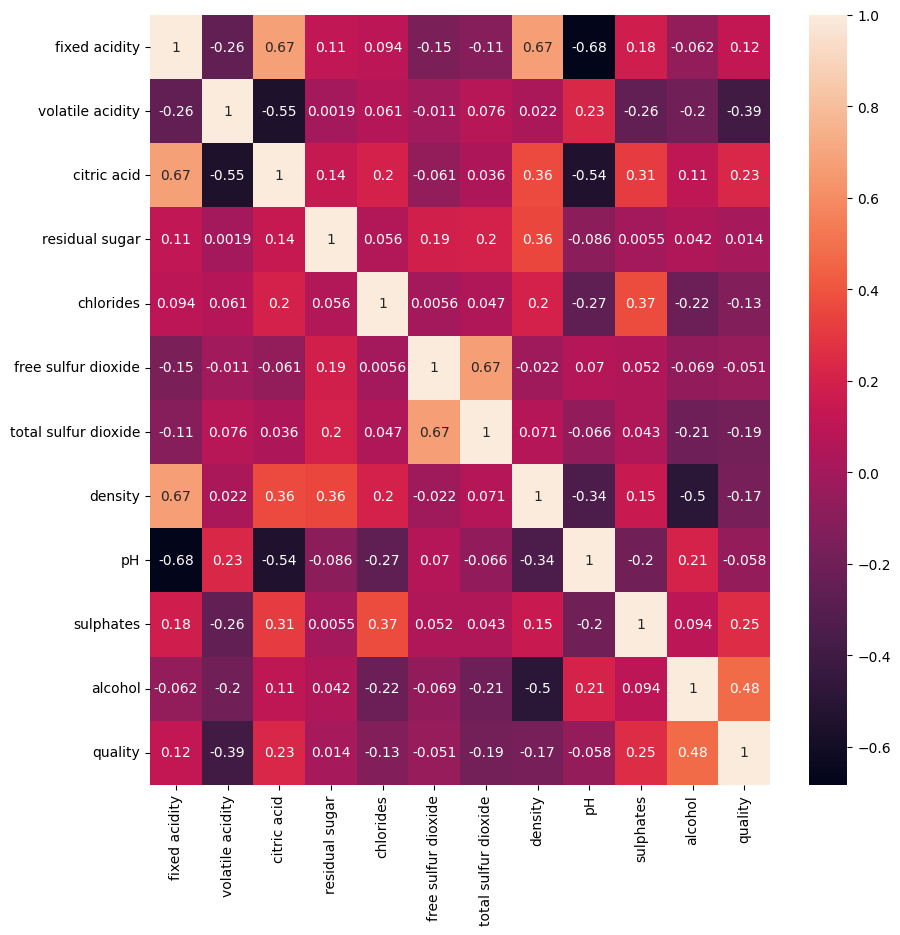

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(),annot=True)
plt.show()

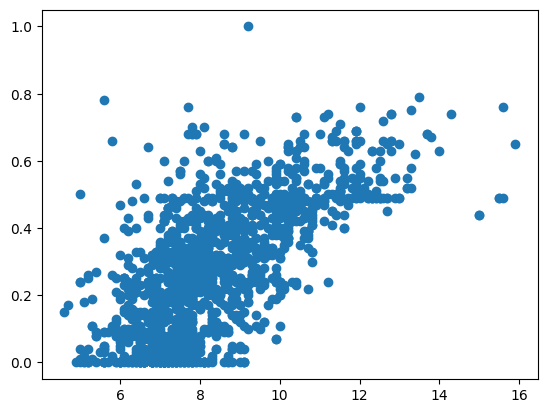

In [63]:
plt.scatter(wine_df['fixed acidity'],wine_df['citric acid'])

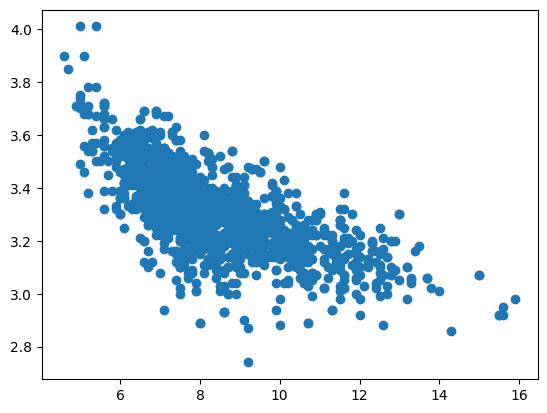

In [64]:
plt.scatter(wine_df['fixed acidity'],wine_df['pH'])

In [ ]:
file_path = "C:\\Users\\DBRok\\OneDrive\\Omkar Sir\\DS N-IT Google Classroom Material\\winequality_red.csv"

wine_df = pd.read_csv(file_path)

wine_df


wine_df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(),annot=True)


plt.scatter(wine_df['fixed acidity'],wine_df['citric acid'])